### Exemplo: Carteira de Ativos

- Temos a carteira no arquivo "Carteira.xlsx" e queremos comparar essa carteira com o índice IBOV para saber se ela ganhou do índice

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override()

In [24]:
df_carteira = pd.read_excel("Carteira.xlsx")
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [25]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA")

df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"]
display(df_cotacoes)

[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-06-06,15.705791,70.097572,111.070000,27.853479,11.61,25.425608,142.308105,37.319401,11.81,14.716660,106.650002,95.348885,102.558334
2023-06-07,15.696324,70.454765,111.779999,28.547371,12.14,25.500004,142.280121,36.290546,11.36,14.822258,107.400002,95.609673,102.201866
2023-06-09,15.961401,70.758362,113.209999,28.430094,12.38,25.853395,143.920578,37.132336,11.46,15.311854,107.800003,95.926308,102.239388
2023-06-12,15.828860,70.999451,113.639999,28.733061,12.31,25.574406,144.088333,37.038803,11.43,15.331054,108.019997,95.041565,102.323822
2023-06-13,15.847793,70.677994,112.940002,28.097807,11.87,25.862698,145.309341,35.168156,11.05,15.302254,105.849998,94.994987,102.370720
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,12.970000,69.400002,120.639999,32.099998,12.79,31.850000,159.520004,13.200000,6.45,15.440000,99.099998,88.889999,103.900002
2024-05-27,12.930000,68.900002,120.870003,32.230000,12.77,31.740000,160.000000,13.150000,6.46,15.280000,99.620003,88.059998,103.599998
2024-05-28,12.920000,68.879997,120.180000,32.240002,12.78,31.570000,159.619995,12.290000,6.65,14.830000,98.400002,86.610001,103.949997


#### Ajustando os dados

In [26]:
print(df_cotacoes.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 246 entries, 2023-06-06 to 2024-05-31
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   246 non-null    float64
 1   BCRI11.SA  246 non-null    float64
 2   BOVA11.SA  246 non-null    float64
 3   BPAC11.SA  246 non-null    float64
 4   ENEV3.SA   246 non-null    float64
 5   ITUB4.SA   246 non-null    float64
 6   KNRI11.SA  246 non-null    float64
 7   MGLU3.SA   246 non-null    float64
 8   MOVI3.SA   246 non-null    float64
 9   NTCO3.SA   246 non-null    float64
 10  SMAL11.SA  246 non-null    float64
 11  VILG11.SA  246 non-null    float64
 12  XPLG11.SA  246 non-null    float64
dtypes: float64(13)
memory usage: 26.9 KB
None


#### Para compararmos oscilações, precisamos normalizar

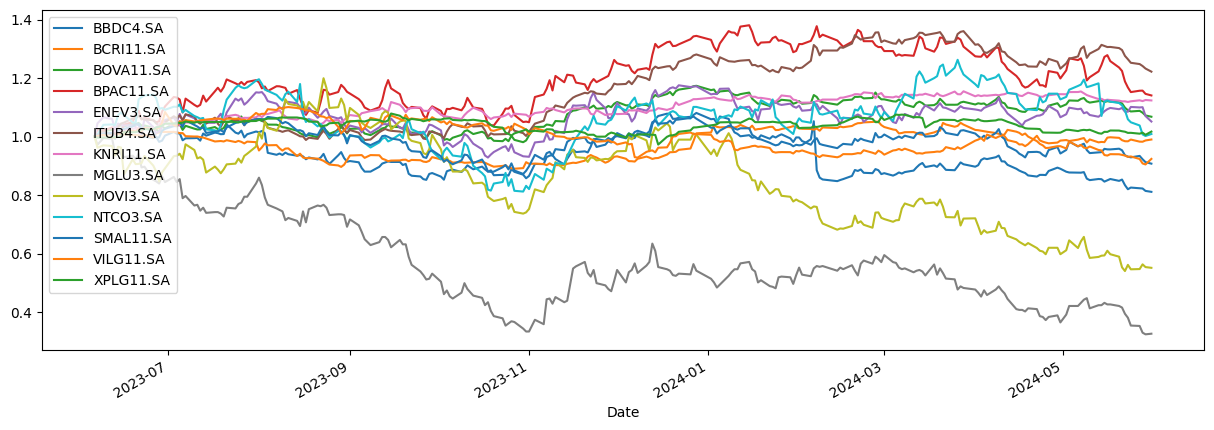

In [27]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.show()

#### Puxando o IBOV para comparar

In [28]:
df_ibov = pdr.get_data_yahoo("^BVSP",data_inicial, data_final)["Adj Close"]
display(df_ibov)

[*********************100%%**********************]  1 of 1 completed


Date
2023-06-06    114610.000000
2023-06-07    115488.000000
2023-06-09    117019.000000
2023-06-12    117336.000000
2023-06-13    116743.000000
                  ...      
2024-05-24    124306.000000
2024-05-27    124496.000000
2024-05-28    123780.000000
2024-05-29    122707.000000
2024-05-31    122204.203125
Name: Adj Close, Length: 246, dtype: float64

#### Vendo valores investidos

In [29]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qnt_acoes = df_carteira.loc[df_carteira["Ativos"] == ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qnt_acoes * df_cotacoes[f"{ativo}.SA"]
    
df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-06-06,11106.999969,10665.000153,3731.940079,1570.579052,7627.682304,1160.999966,1181.000042,2785.347939,1471.665955,7009.757233,9534.888458,14230.810547,10255.833435,82332.505131
2023-06-07,11177.999878,10740.000153,3629.054642,1569.632435,7650.001144,1214.000034,1135.999966,2854.737091,1482.225800,7045.476532,9560.967255,14228.012085,10220.186615,82508.293629
2023-06-09,11320.999908,10780.000305,3713.233566,1596.140099,7756.018639,1238.000011,1146.000004,2843.009377,1531.185436,7075.836182,9592.630768,14392.057800,10223.938751,83209.050846
2023-06-12,11363.999939,10801.999664,3703.880310,1582.886028,7672.321701,1231.000042,1143.000031,2873.306084,1533.105373,7099.945068,9504.156494,14408.833313,10232.382202,83150.816250
2023-06-13,11294.000244,10584.999847,3516.815567,1584.779263,7758.809280,1186.999989,1105.000019,2809.780693,1530.225372,7067.799377,9499.498749,14530.934143,10237.071991,82706.714535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,12063.999939,9909.999847,1319.999981,1297.000027,9555.000114,1278.999996,644.999981,3209.999847,1543.999958,6940.000153,8888.999939,15952.000427,10390.000153,82995.000362
2024-05-27,12087.000275,9962.000275,1314.999962,1293.000031,9521.999931,1277.000046,646.000004,3222.999954,1527.999973,6890.000153,8805.999756,16000.000000,10359.999847,82909.000206
2024-05-28,12018.000031,9840.000153,1228.999996,1292.000008,9470.999908,1277.999973,665.000010,3224.000168,1482.999992,6887.999725,8661.000061,15961.999512,10394.999695,82405.999231


#### Comparando carteira com o Índice

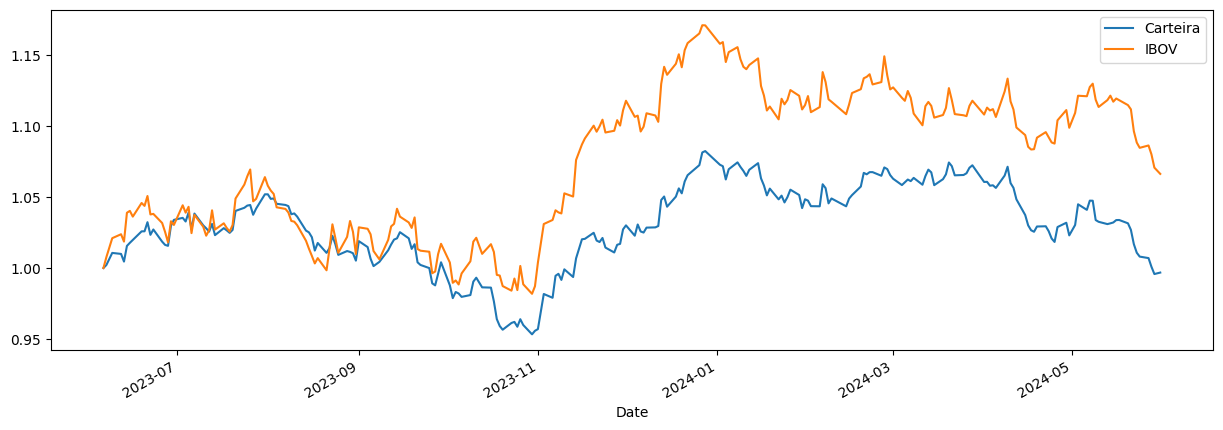

In [30]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15,5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
plt.show()

#### Calculando retorno e correlação

In [31]:
# Retorno
retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1

print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")

Retorno IBOV: 6.6%
Retorno Carteira: -0.3%


C:\Users\Meu pc\AppData\Local\Temp\ipykernel_7832\1260057522.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm[-1] - 1
C:\Users\Meu pc\AppData\Local\Temp\ipykernel_7832\1260057522.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_valor_investido_norm["Total"][-1] - 1


In [33]:
# Correlação

correlacao = df_valor_investido["Total"].corr(df_ibov)
print(correlacao)

0.8149925317139004
